In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of HAT_P_32b
# https://exoplanetarchive.ipac.caltech.edu/overview/HAT-P-32b

In [3]:
df = pd.read_csv("HAT_P_32_literature.csv")#, header=None)
df = df.set_index('Parameter')

In [4]:
df

,TICv8,Wang et al. 2019,Gaia DR2,Bonomo et al. 2017,Stassun et al. 2017,Nortmann et al. 2016,Zhao et al. 2014,Knutson et al. 2014,Gibson et al. 2013,Albrecht et al. 2012,Hartman et al. 2011,ExoFOP-TESS TOI
Parameter,,,,,,,,,,,,
T_eff,6340.000+153.800-96.707,6001+/-88,6309.00+271.00-459.06,6207+/-88,6207+/-88,6269+/-64,6269+/-64,---,---,---,6207+/-88,6340.000+/-125.254
stellar_radius,1.2630400+0.0713859-0.0489859,1.367+0.031-0.030,1.2374414+0.2018300-0.0998300,1.219+/-0.016,1.19+/-0.10,---,1.219+/-0.016,---,1.219+/-0.016,---,1.219+/-0.016,1.26303994655609+/-0.06018590000000
log_g,4.3338700+0.0916974-0.0769860,4.22+/-0.04,---,---,4.33+/-0.01,4.33+/-0.01,---,---,---,---,---,4.3338700+/-0.0843417
metallicity,---,-0.16+/-0.08,---,-0.040+/-0.080,-0.04,-0.040+/-0.080,-0.04+/-0.08,-0.040+/-0.080,---,---,---,---
colour,#1f77b4,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf,b,g


In [5]:
df_ref_list = df.columns

df_T_eff_list = df.loc['T_eff'] #Stellar effective temperature (K)
df_metallicity_list = df.loc['metallicity'] #Metallicity ([Fe/H])
df_log_g_list = df.loc['log_g'] #Stellar surface gravity (log10(cm/s^2)
df_rs_list = df.loc['stellar_radius']

T_eff_list, T_eff_ref_list = read_df_params(df_T_eff_list, df_ref_list)
metallicity_list, metallicity_ref_list = read_df_params(df_metallicity_list, df_ref_list)
log_g_list, log_g_ref_list = read_df_params(df_log_g_list, df_ref_list)
rs_list, rs_ref_list = read_df_params(df_rs_list, df_ref_list)

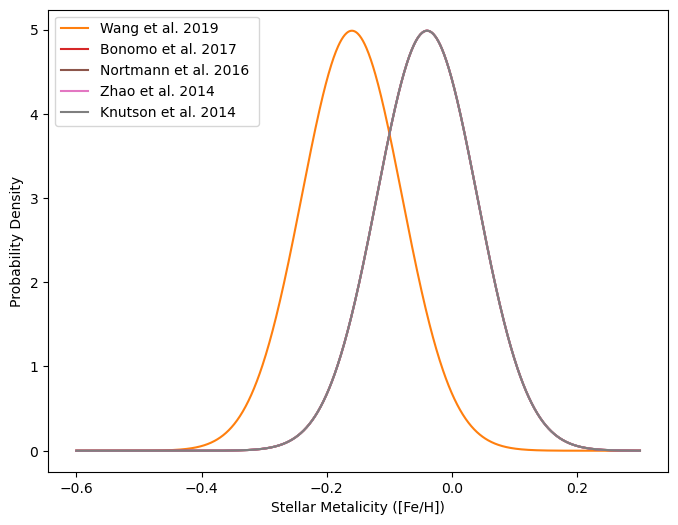

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(-0.6, 0.3, 1000)
for obj, author in zip(metallicity_list, metallicity_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Metalicity ([Fe/H])")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

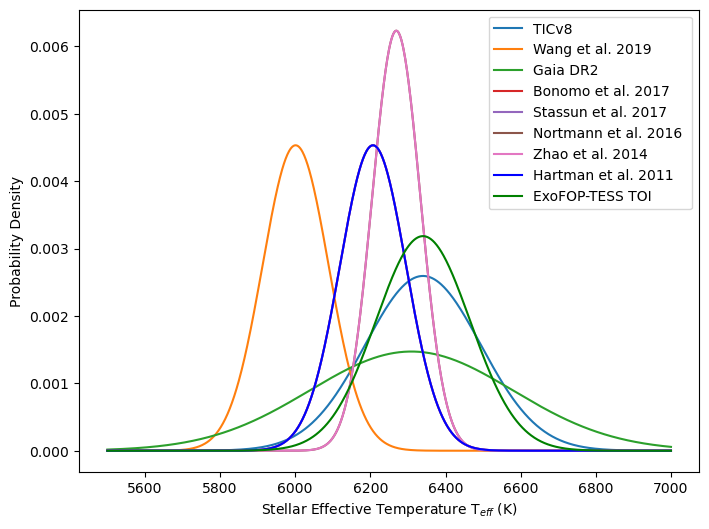

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(5500, 7000, 1000)
for obj, author in zip(T_eff_list, T_eff_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Effective Temperature T$_{eff}$ (K)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

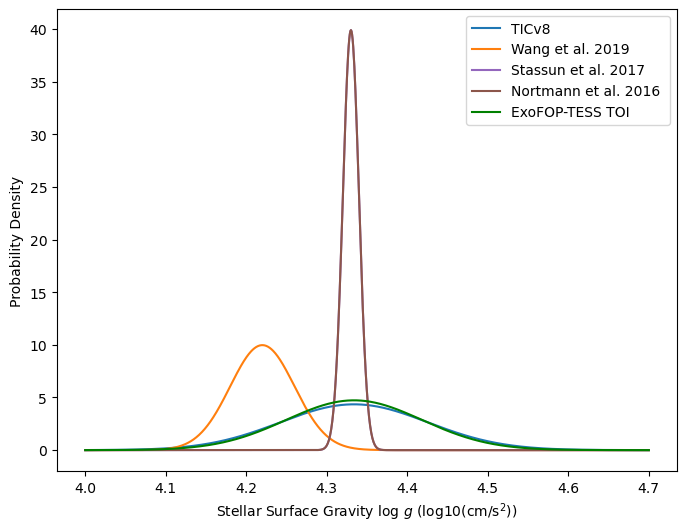

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(4.0, 4.7, 1000)
for obj, author in zip(log_g_list, log_g_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Surface Gravity log $g$ (log10(cm/s$^2$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

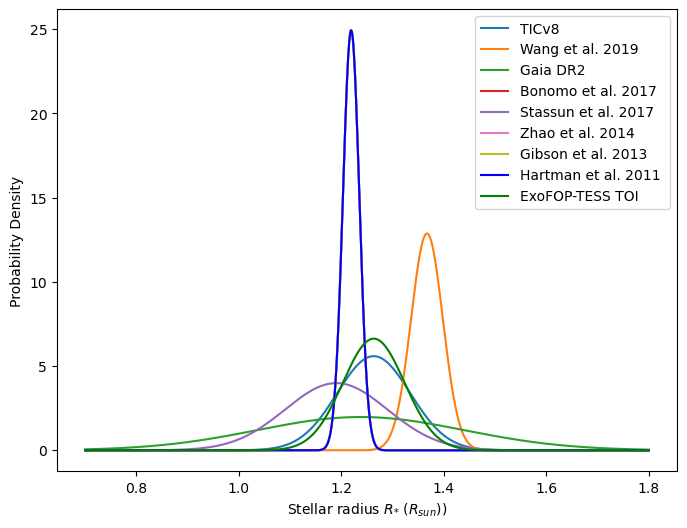

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.7, 1.8, 1000)
for obj, author in zip(rs_list, rs_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar radius $R_{*}$ ($R_{sun}$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()